# Neural Network from scratch

Importing the required libraries.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn import datasets
%matplotlib inline

warnings.filterwarnings('ignore')

We will start by creating our own dataset for our classification task.

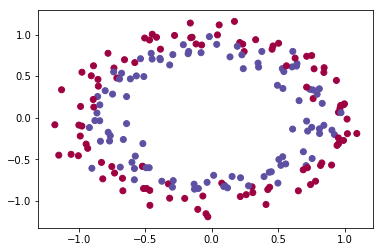

In [2]:
X,y = datasets.make_circles(n_samples=200,noise=0.09)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Spectral)

Neural network will consist of three layers one input , one hidden , one output.

Activation function used for hidden layer is tanh.

Outputs will br given by softmax probabilities and loss used is cross-entropy loss.

In [3]:
class model(object):
    def __init__(self,in_dim,hidden_dim,out_dim):
        self.in_dim = in_dim
        self.hidden_dim = hidden_dim
        self.out_dim = out_dim
        np.random.seed(0)
        self.W1 = np.random.randn(in_dim,hidden_dim)/np.sqrt(in_dim) #initializing weights to standard normal distribution
        self.b1 = np.zeros((1,hidden_dim))          #initializing the biases to 1d array of all 0's       
        self.W2 = np.random.randn(hidden_dim,out_dim)/np.sqrt(hidden_dim)
        self.b2 = np.zeros((1,out_dim))
    
    def forward_prop(self,x):
        x_mod = x.reshape((1,x.shape[0]))
        z1 = x_mod.dot(self.W1) + self.b1
        a1 = np.tanh(z1)
        z2 = a1.dot(self.W2) + self.b2
        exp_scores = np.exp(z2)
        prob = exp_scores/np.sum(exp_scores)
        return prob,a1
    
    def back_prop(self,x,y,lr,reg_param):
        prob,a1 = self.forward_prop(x)
        x_mod = x.reshape((1,x.shape[0]))
        d3 = prob
        d3[0,y] -= 1
        dW2 = (a1.T).dot(d3)
        db2 = d3
        d2 = d3.dot((self.W2).T)*(1-pow(a1,2))
        dW1 = (x_mod.T).dot(d2)
        db1 = d2
        
        #regularization
        dW2 += reg_param * pow(dW2,2) 
        dW1 += reg_param * pow(dW1,2)
        
        self.W1 -= lr*dW1
        self.W2 -= lr*dW2
        self.b1 -= lr*db1
        self.b2 -= lr*db2
    
    def calc_loss(self,X,reg_param):
        num_examples = X.shape[0]
        z1 = X.dot(self.W1) + self.b1
        a1 = np.tanh(z1)
        z2 = a1.dot(self.W2) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        #Cross-Entropy loss calculations over our whole dataset.
        corect_logprobs = -np.log(probs[range(num_examples), y])
        data_loss = np.sum(corect_logprobs)
        data_loss += reg_param/2 * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        return 1./num_examples * data_loss

In [4]:
#Using hidden layer of width 3 
my_net = model(2,3,2)

Implementing SGD for updates with 5 epochs.

In [5]:
for i in range(1000):
    for i in range(X.shape[0]): 
        my_net.forward_prop(X[i])
        my_net.back_prop(X[i],y[i],lr = 0.01,reg_param = 0.001)
    print(my_net.calc_loss(X,reg_param=0.001))    

0.697529187007094
0.6931305267534192
0.6914694578515337
0.6904186930953252
0.6895536334492067
0.6887501362168433
0.6879605991450157
0.6871640486940764
0.6863506017216269
0.6855155189058835
0.6846566766658755
0.6837734076537655
0.6828659137345605
0.6819349224253253
0.6809814498181268
0.6800066152762854
0.6790114883988896
0.6779969628939633
0.6769636565603829
0.6759118369395877
0.6748413710329176
0.6737516961325549
0.6726418079004539
0.6715102615436025
0.6703551822311961
0.6691742816264196
0.6679648783856793
0.6667239215590613
0.6654480168976906
0.664133457065826
0.6627762576218388
0.6613722013330494
0.65991689387515
0.6584058341669129
0.6568345024099006
0.655198468228245
0.6534935200243365
0.6517158147065618
0.649862044309086
0.6479296128454081
0.6459168133232466
0.6438229916899898
0.6416486822167338
0.6393956981561618
0.6370671630079308
0.6346674716816135
0.6322021770923099
0.6296778055635067
0.6271016126974771
0.6244812987181328
0.6218247073775348
0.6191395344108898
0.6164330698947912

0.39552375040232096
0.39544719827011066
0.3953710483423168
0.3952952981843123
0.395219945382389
0.39514498754351934
0.3950704222951146
0.39499624728479454
0.3949224601801521
0.39484905866852676
0.3947760404567778
0.39470340327106124
0.39463114485661066
0.3945592629775199
0.39448775541652703
0.3944166199748068
0.39434585447175774
0.3942754567447983
0.3942054246491637
0.39413575605770496
0.39406644886069003
0.39399750096561004
0.3939289102969861
0.3938606747961776
0.39379279242119664
0.39372526114652145
0.39365807896291366
0.3935912438772383
0.39352475391228614
0.3934586071065964
0.39339280151428646
0.39332733520487756
0.39326220626312813
0.39319741278886616
0.393132952896826
0.393068824716486
0.3930050263919071
0.39294155608157694
0.3928784119582525
0.3928155922088085
0.392753095034083
0.3926909186487294
0.3926290612810692
0.3925675211729458
0.39250629657957975
0.39244538576942767
0.39238478702404317
0.3923244986379373
0.39226451891844305
0.3922048461855801
0.3921454787719233
0.39208641

0.3825309893475759
0.3825258810141678
0.38252082843786084
0.3825158314056115
0.38251088970527364
0.3825060031255923
0.3825011714562003
0.3824963944876141
0.3824916720112303
0.3824870038193193
0.3824823897050226
0.3824778294623489
0.3824733228861694
0.382468869772213
0.382464469917064
0.3824601231181561
0.3824558291737706
0.38245158788302847
0.3824473990458917
0.382443262463155
0.38243917793644355
0.38243514526820926
0.38243116426172585
0.38242723472108603
0.382423356451197
0.3824195292577768
0.3824157529473508
0.3824120273272474
0.3824083522055935
0.3824047273913132
0.38240115269412195
0.38239762792452275
0.38239415289380346
0.3823907274140332
0.3823873512980577
0.38238402435949653
0.38238074641273867
0.3823775172729408
0.38237433675601984
0.38237120467865426
0.3823681208582766
0.3823650851130729
0.382362097261976
0.3823591571246655
0.3823562645215619
0.3823534192738236
0.3823506212033454
0.3823478701327509
0.3823451658853935
0.3823425082853508
0.3823398971574215
0.3823373323271224
0.3